In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Customer_Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
columns = data.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

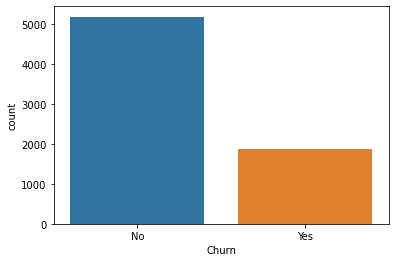

In [10]:
sns.countplot(x = 'Churn' , data = data)

In [11]:
missing_percentage = (data.isnull().sum())/(data.shape[0])
missing_percentage

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [12]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [13]:
data['Churn'] = data['Churn'].map({'Yes':1 , 'No':0})
# data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [14]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


In [15]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


 SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

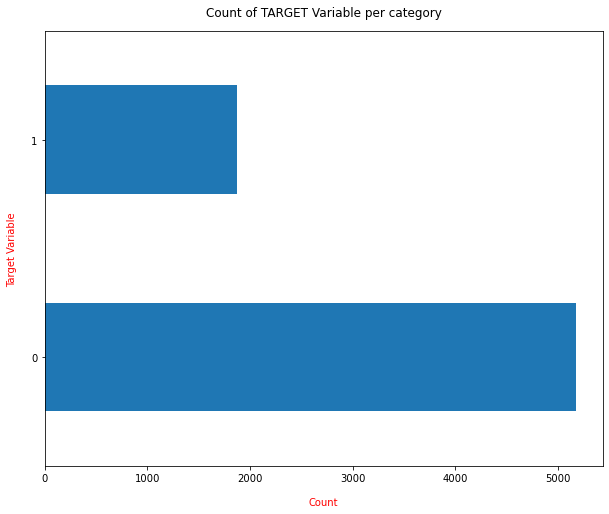

In [17]:
data['Churn'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Count", labelpad=14 ,color = 'Red')
plt.ylabel("Target Variable", labelpad=14 ,color = 'Red')
plt.title("Count of TARGET Variable per category", y=1.02);

In [18]:
# PERCENTAGE OF CHURNS 
data['Churn'].value_counts()*100/len(data['Churn'])

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [19]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insights.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


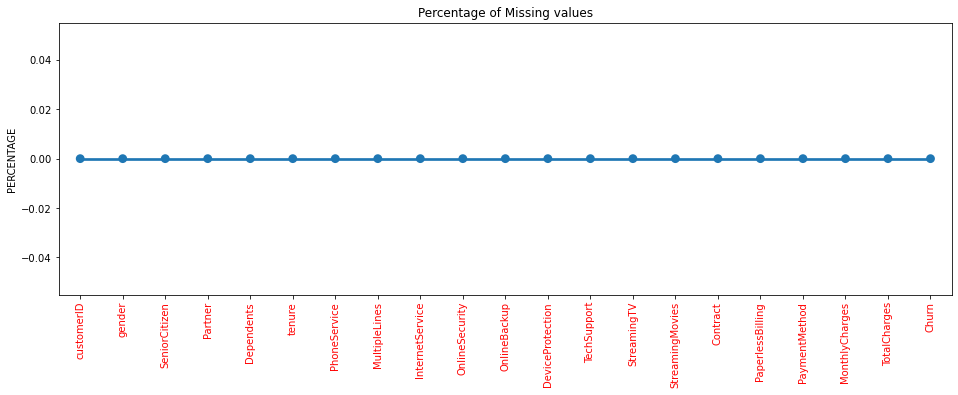

In [20]:
missing = pd.DataFrame(missing_percentage).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(columns,0,data=missing)
plt.xticks(rotation =90,fontsize = 10,color='Red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Data Cleaning

In [21]:
df = data.copy()

In [22]:
#Total Charges should be numeric amount
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df.loc[df.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [24]:
#Since the % of these records compared to total dataset is very low ie 0.15%,
#it is safe to ignore them from further processing.
df.dropna(how = 'any', inplace = True)

# how : {'any', 'all'}, default 'any'
# Determine if row or column is removed from DataFrame, when we have
#   at least one NA or all NA.
#   * 'any' : If any NA values are present, drop that row or column.
#   * 'all' : If all values are NA, drop that row or column.

In [25]:
df.tenure.max()

72

In [26]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

In [27]:
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [28]:
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)
# right : bool, default True
# Indicates whether `bins` includes the rightmost edge or not

In [29]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [30]:
df.drop(columns=['tenure','customerID'],axis=1,inplace=True)

In [31]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36


# Data Exploration

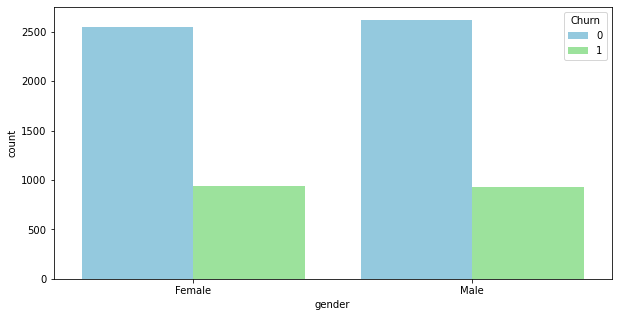

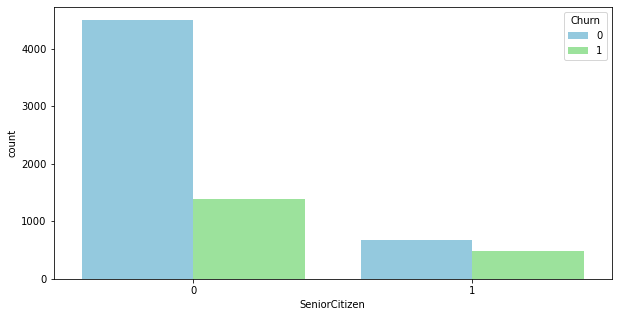

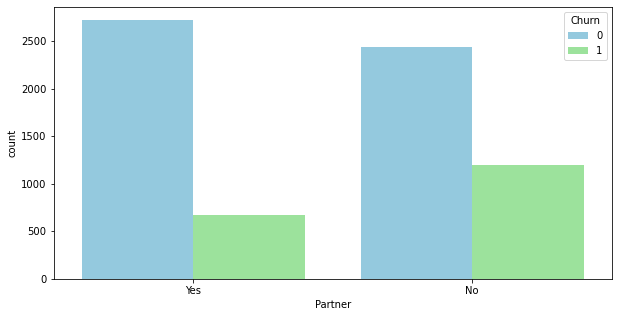

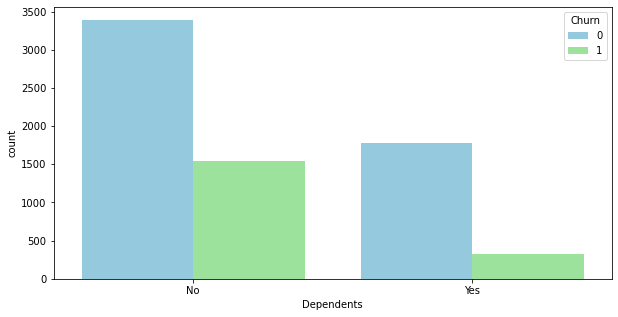

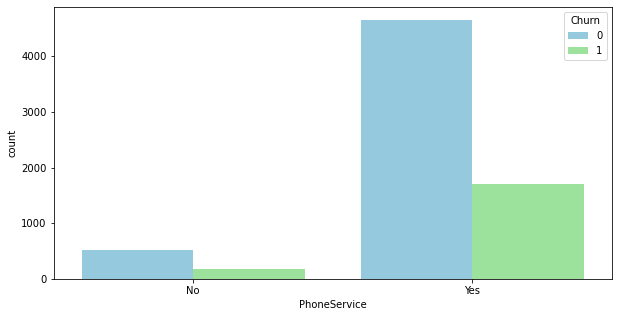

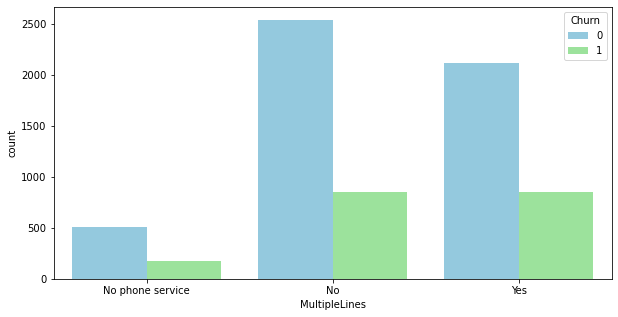

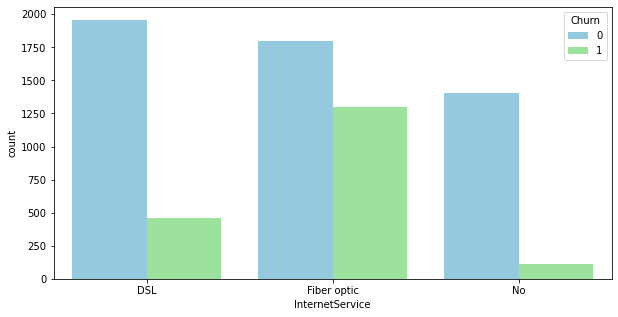

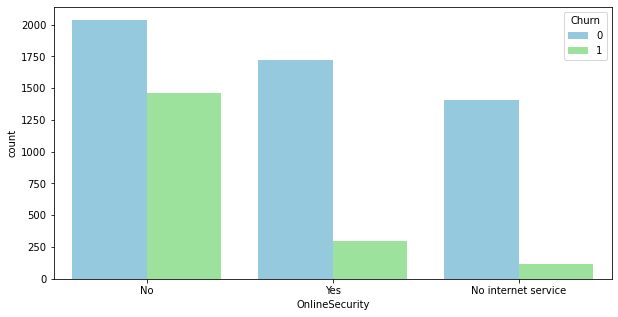

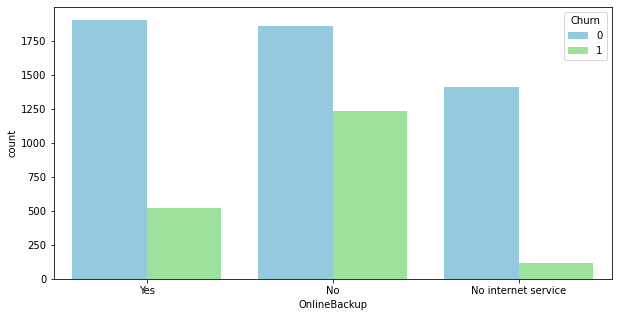

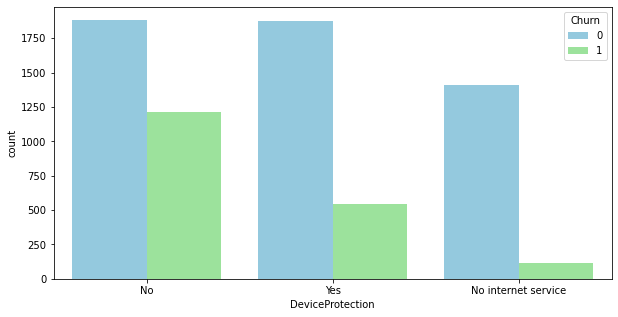

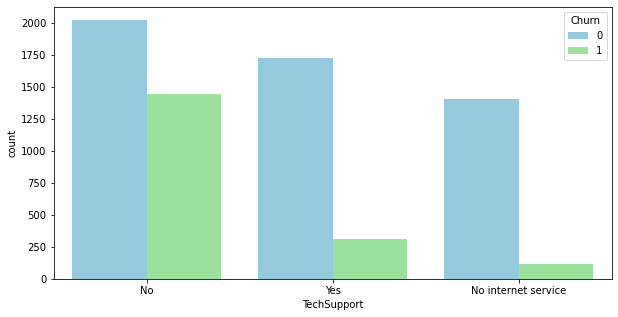

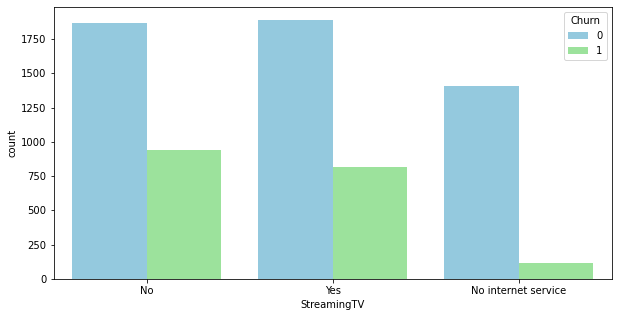

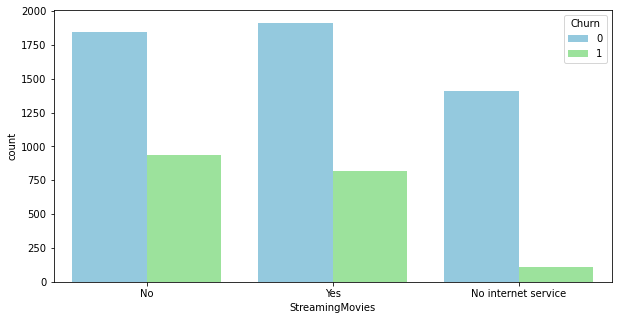

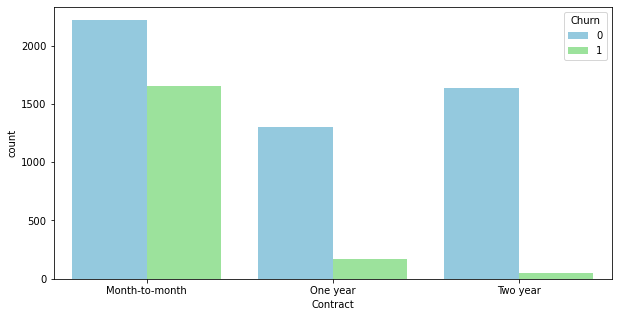

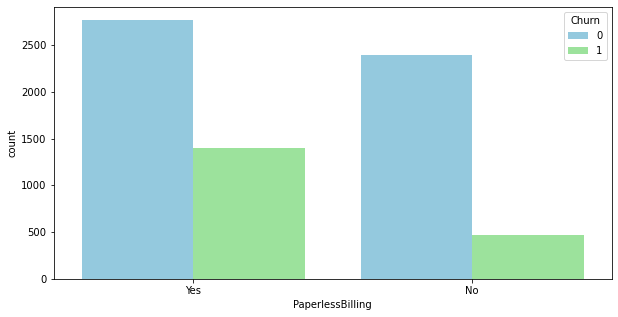

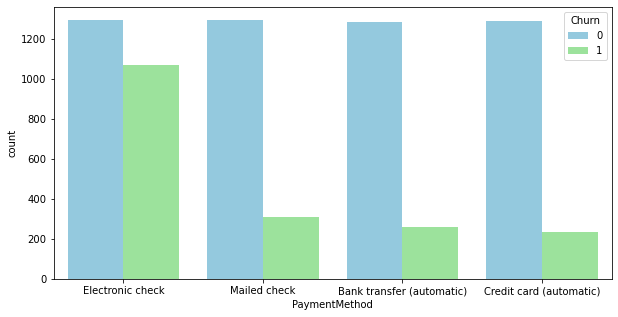

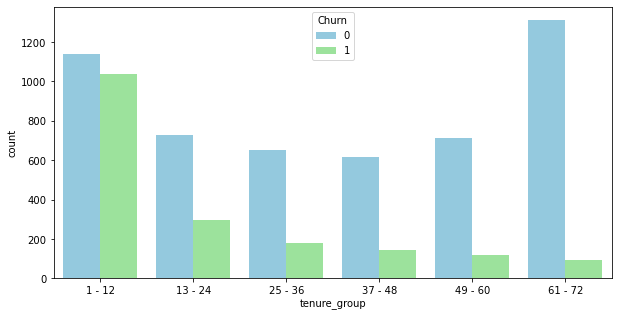

In [32]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i,figsize=(10,5))
    sns.countplot(data=df, x=predictor, hue='Churn',palette=['SkyBlue','LightGreen'])

In [33]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


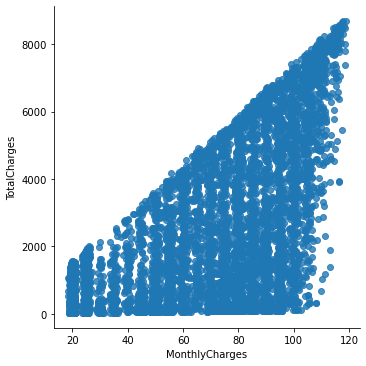

In [34]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
# fit_reg : bool, optional
#     If ``True``, estimate and plot a regression model relating the ``x``
#     and ``y`` variables.


# as expected as monthly charges increase total charges increases

Churn by Monthly Charges

Text(0.5, 1.0, 'Monthly charges by churn')

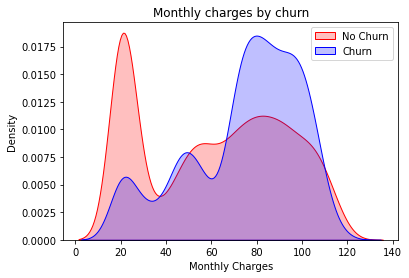

In [35]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn by Total Charges

Text(0.5, 1.0, 'Total Charges by Churn')

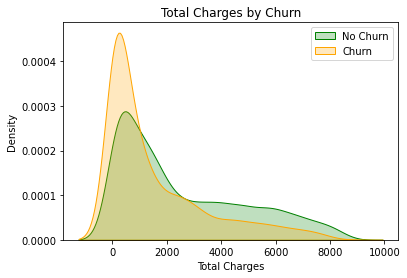

In [36]:
mth = sns.kdeplot(df_dummies['TotalCharges'][df_dummies['Churn']==0] , shade=True,color='Green')
mth = sns.kdeplot(df_dummies['TotalCharges'][(df_dummies['Churn']==1)] ,ax =mth, shade=True,color='Orange')
mth.legend(['No Churn','Churn'],loc='best')
mth.set_ylabel('Density')
mth.set_xlabel("Total Charges")
mth.set_title('Total Charges by Churn')

This is surprising as we have higher churn rate at lower total charges while things are pretty bit rational for monthly charges

### lets find out about this :)

In [37]:
df_dummies.corr()['Churn'][df_dummies.corr()['Churn'].values > 0]

SeniorCitizen                     0.150541
MonthlyCharges                    0.192858
Churn                             1.000000
gender_Female                     0.008545
Partner_No                        0.149982
Dependents_No                     0.163128
PhoneService_Yes                  0.011691
MultipleLines_Yes                 0.040033
InternetService_Fiber optic       0.307463
OnlineSecurity_No                 0.342235
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
TechSupport_No                    0.336877
StreamingTV_No                    0.128435
StreamingTV_Yes                   0.063254
StreamingMovies_No                0.130920
StreamingMovies_Yes               0.060860
Contract_Month-to-month           0.404565
PaperlessBilling_Yes              0.191454
PaymentMethod_Electronic check    0.301455
tenure_group_1 - 12               0.319628
tenure_group_13 - 24              0.019929
Name: Churn, dtype: float64

In [38]:
# However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then 
# the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge.
# Hence, all these 3 factors i.e Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [39]:
df_dummies[['MonthlyCharges','TotalCharges','Churn','tenure_group_13 - 24',
           'tenure_group_25 - 36','tenure_group_37 - 48','tenure_group_49 - 60','tenure_group_61 - 72']]

,MonthlyCharges,TotalCharges,Churn,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,0,0,0,0
1,56.95,1889.50,0,0,1,0,0,0
2,53.85,108.15,1,0,0,0,0,0
3,42.30,1840.75,0,0,0,1,0,0
4,70.70,151.65,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,1,0,0,0,0
7039,103.20,7362.90,0,0,0,0,0,1
7040,29.60,346.45,0,0,0,0,0,0
7041,74.40,306.60,1,0,0,0,0,0


In [40]:
df_dummies.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

<AxesSubplot:>

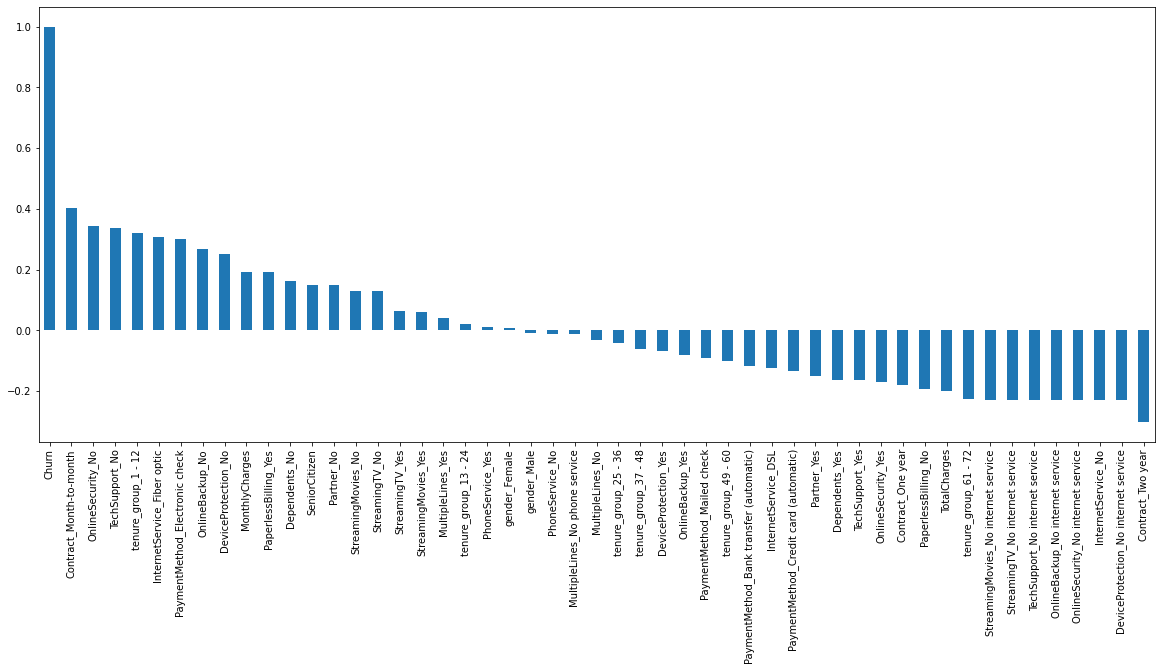

In [41]:
fig = plt.figure(figsize =(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

INFO:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and multiple lines have alomost NO impact on Churn

<AxesSubplot:>

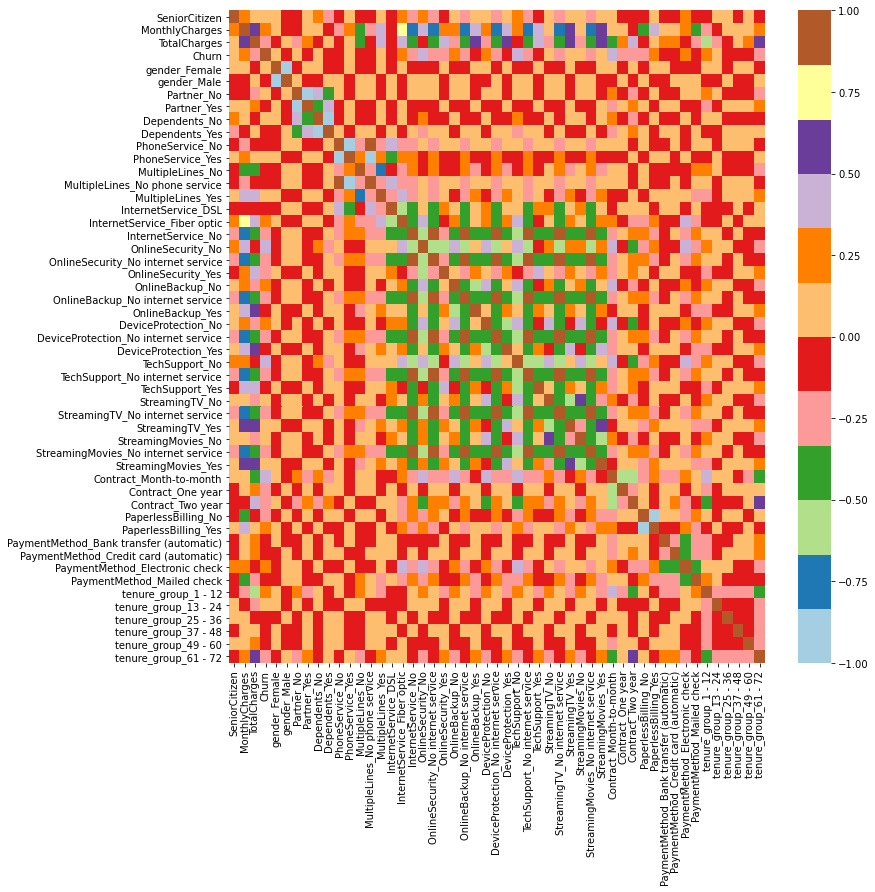

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")
# cmap : matplotlib colormap name or object, or list of colors

In [43]:
new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]

In [44]:
def univariateplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

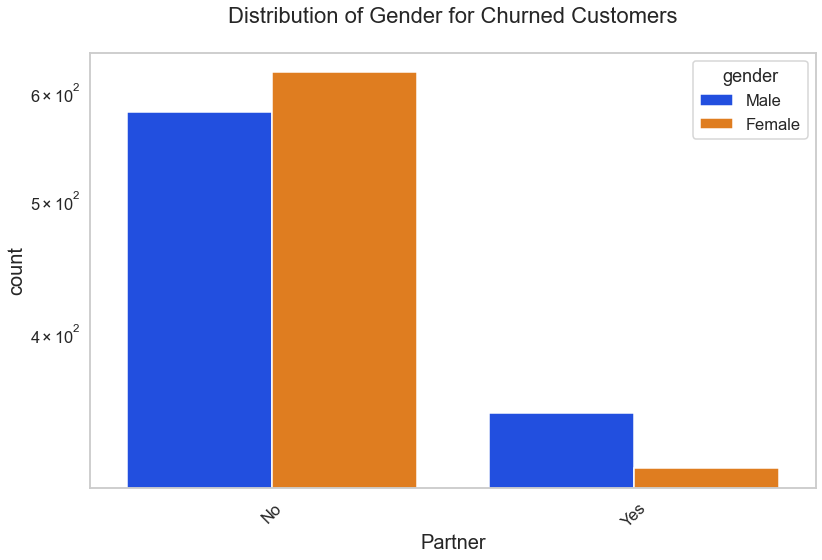

In [45]:
univariateplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

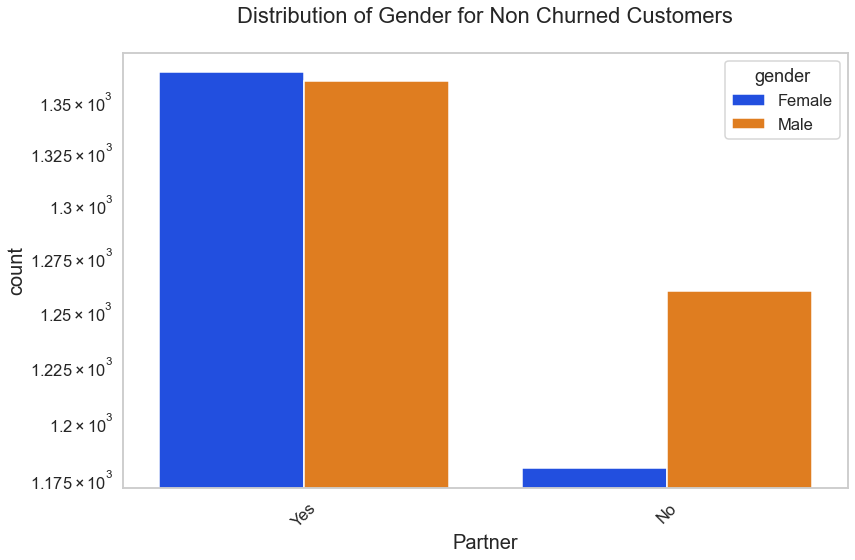

In [46]:
univariateplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

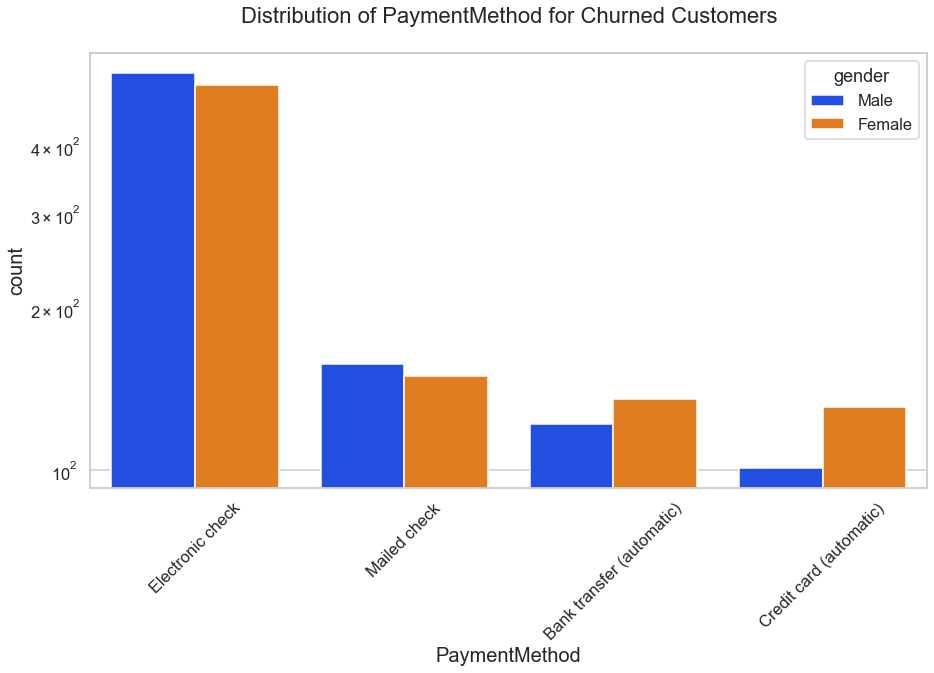

In [47]:
univariateplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

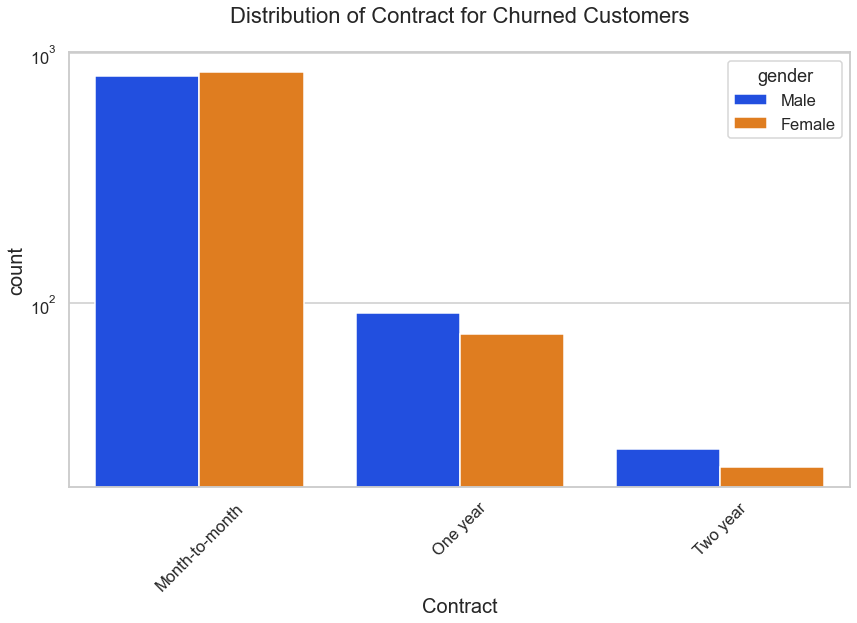

In [48]:
univariateplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

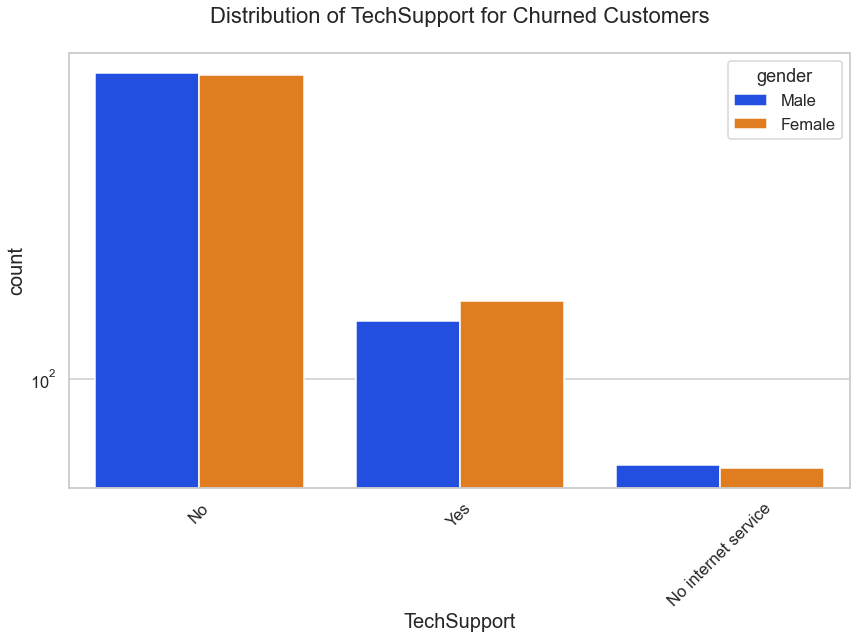

In [49]:
univariateplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

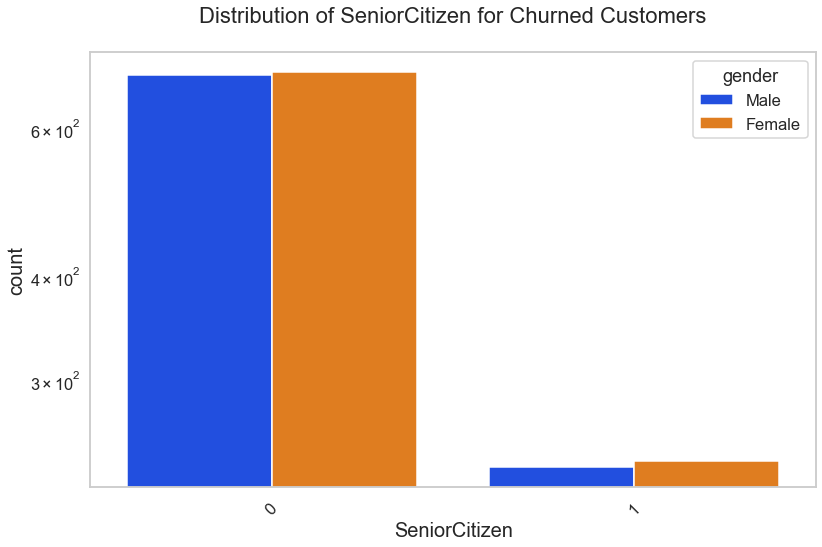

In [50]:
univariateplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

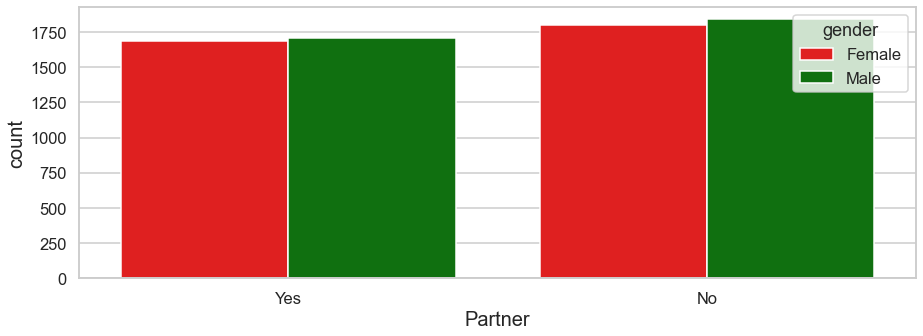

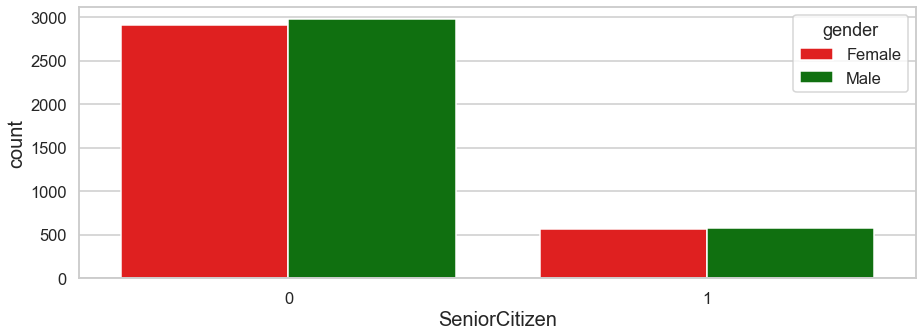

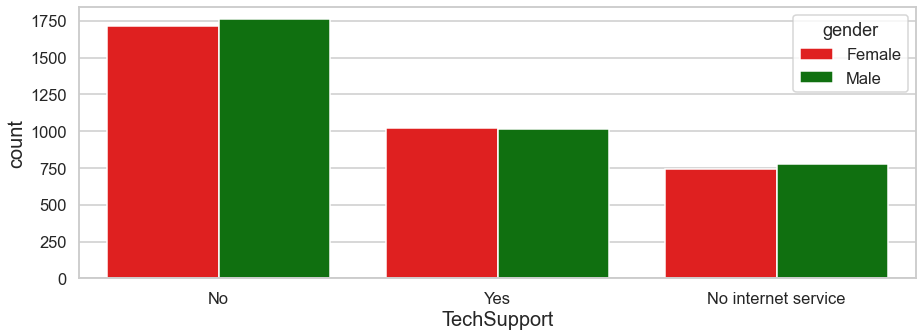

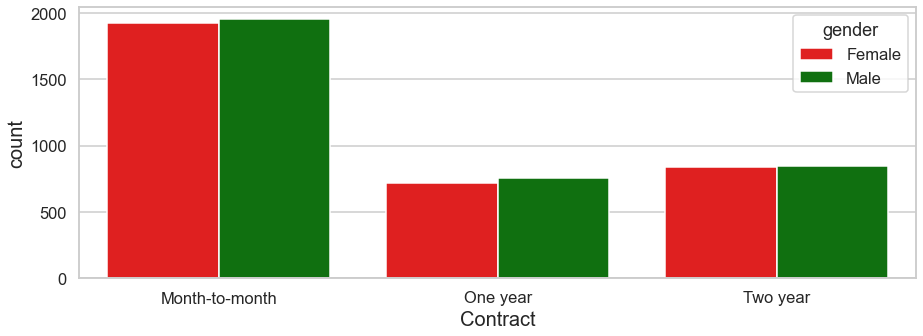

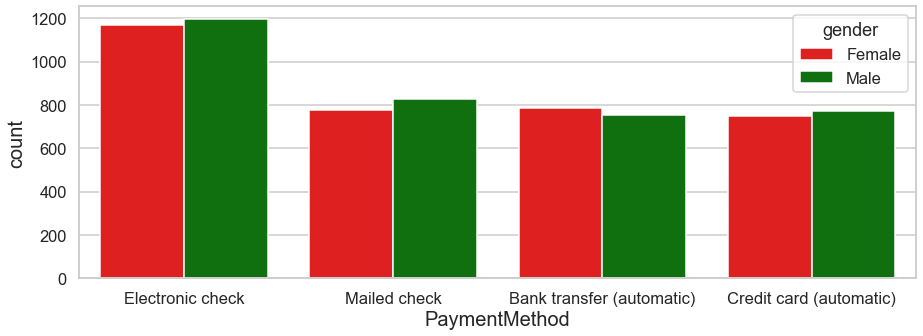

In [61]:
for i,j in enumerate(df[['Partner','SeniorCitizen','TechSupport','Contract','PaymentMethod']]):
    plt.figure(i,figsize=(15,5))
    sns.countplot(data=df,x=j,hue='gender',palette=['Red','Green'])

These are some of the quick insights from this exercise:

- Electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners


Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [62]:
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [63]:
df_dummies.to_csv('dummy_churn.csv')

In [64]:
pd.read_csv("dummy_churn.csv").head(6)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
5,5,0,99.65,820.50,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


# MODEL BUILDING

In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
model_df=pd.read_csv("dummy_churn.csv")
model_df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [67]:
model_df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [68]:
model_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [69]:
X = model_df.drop(['Churn'],axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [70]:
Y = model_df['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [72]:
xtrain.shape , ytrain.shape

((5625, 50), (5625,))

In [73]:
xtest.shape , ytest.shape

((1407, 50), (1407,))

### DECISION TREE CLASSIFIER

In [74]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [75]:
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [76]:
y_pred=model_dt.predict(xtest)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [77]:
model_dt.score(xtest,ytest)

0.7896233120113717

In [78]:
print(classification_report(ytest, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1014
           1       0.66      0.51      0.57       393

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [81]:
print(confusion_matrix(ytest,y_pred))

[[911 103]
 [193 200]]


As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

In [86]:
## TO DEAL WITH THIS KIND OF IMBALANCED DATASET WE WILL USE SMOOTEEN WHICH IS BASICALLY USED FOR UPSAMPLINGG AND DOWNSAMPLING

from imblearn.combine import SMOTEENN

In [89]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,Y)

In [90]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [92]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [93]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)

0.9471440750213129


In [99]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       538
           1       0.95      0.95      0.95       635

    accuracy                           0.95      1173
   macro avg       0.95      0.95      0.95      1173
weighted avg       0.95      0.95      0.95      1173



as we can see the imbalanced dataset gets balanced as the accuracy of non-churners increased to a balanced percentage

In [95]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[507  31]
 [ 31 604]]


### LOGISTIC REGRESSION

In [111]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain, ytrain)
Y_pred = logreg.predict(xtest)
print("Score:",logreg.score(xtrain,ytrain))
print("Accuracy:",metrics.accuracy_score(ytest, Y_pred))
print("Precision:",metrics.precision_score(ytest, Y_pred))
print("Recall:",metrics.recall_score(ytest, Y_pred))

Score: 0.8062222222222222
Accuracy: 0.7910447761194029
Precision: 0.6749116607773852
Recall: 0.4860050890585242


In [107]:
logreg.intercept_

array([-0.28968701])

In [108]:
logreg.coef_

array([[ 1.62825750e-01,  4.67036057e-03, -2.11556387e-04,
        -1.91677759e-01, -9.80092467e-02, -1.07148686e-01,
        -1.82538320e-01, -3.98775369e-02, -2.49809469e-01,
        -1.86194669e-02, -2.71067539e-01, -2.79737010e-01,
        -1.86194669e-02,  8.66947143e-03, -5.15087719e-01,
         4.11044468e-01, -1.85643755e-01,  1.05431843e-01,
        -1.85643755e-01, -2.09475094e-01,  2.64533187e-02,
        -1.85643755e-01, -1.30496570e-01, -6.66725540e-02,
        -1.85643755e-01, -3.73706970e-02,  1.55521677e-01,
        -1.85643755e-01, -2.59564927e-01, -1.98081922e-01,
        -1.85643755e-01,  9.40386706e-02, -2.02339779e-01,
        -1.85643755e-01,  9.82965277e-02,  7.18317441e-01,
        -1.40295665e-01, -8.67708781e-01, -3.32683473e-01,
         4.29964670e-02, -8.69577018e-02, -1.82391742e-01,
         2.01719806e-01, -2.22057368e-01,  5.75157517e-01,
        -2.21022781e-01, -3.55668699e-01, -3.38550162e-02,
        -1.55196442e-01, -9.91015841e-02]])

In [109]:
confusion_matrix = pd.crosstab(ytest , Y_pred , rownames = ['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,922,92
1,202,191


### RANDOM FOREST CLASSIFIER

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [115]:
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [116]:
Random_y_pred = model_rf.predict(xtest)
model_rf.score(xtest,ytest)

0.7896233120113717

In [117]:
print(classification_report(ytest, Random_y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1014
           1       0.70      0.42      0.53       393

    accuracy                           0.79      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



AGAIN USING SMOOTEEN FOR INCREASE ACCURACY FOR MINORITY CLASS.

In [118]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,Y)

In [119]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [120]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [121]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [122]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [123]:
yr_predict1

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [125]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)

0.9315300084530854


In [126]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       520
           1       0.91      0.97      0.94       663

    accuracy                           0.93      1183
   macro avg       0.94      0.93      0.93      1183
weighted avg       0.93      0.93      0.93      1183



In [127]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[460  60]
 [ 21 642]]


### USING CROSS_VAL SCORE FOR FINDING THE BEST RESULTS WITH RANDOMFOREST AND DECISIONTREE FOR MULTIPLE ITERATIONS

In [131]:
from sklearn. model_selection import cross_val_score

FOR LOGISTIC REGRESSION

In [129]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, xtrain,ytrain, cv=5)
print(cv)
print(cv.mean())

[0.792      0.80088889 0.80533333 0.80266667 0.81688889]
0.8035555555555556


FOR DECISION TREE

In [136]:
# checking decisiontreeclassifier cv_score after smooteen

In [146]:
cv = cross_val_score(model_dt_smote, xr_train,yr_train, cv=5)
print(cv)
print(cv.mean())

[0.91897655 0.92750533 0.94029851 0.92537313 0.92529349]
0.9274894015969852


FOR RANDOM FOREST CLASSIFIER

In [134]:
# checking radomforestclassifier cv_score after smooteen

In [145]:
cv = cross_val_score(model_rf_smote, xr_train1,yr_train1, cv=5)
print(cv)
print(cv.mean())

[0.93241816 0.93980993 0.91966173 0.93446089 0.94080338]
0.9334308185858982


### FINAL CONFUSION MATRIX

FOR DECISION TREE

In [141]:
confusion_matrix_final_DT = pd.crosstab(yr_test, yr_predict,rownames=['Actual'],colnames=['Predicted'],margins=True)

In [142]:
confusion_matrix_final_DT

Predicted,0,1,All
Actual,,,
0,507,31,538
1,31,604,635
All,538,635,1173


In [98]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[481  45]
 [ 24 626]]


FOR RANDOM FOREST 

In [143]:
confusion_matrix_final_RF = pd.crosstab(yr_test1, yr_predict1,rownames=['Actual'],colnames=['Predicted'],margins=True)

In [144]:
confusion_matrix_final_RF

Predicted,0,1,All
Actual,,,
0,460,60,520
1,21,642,663
All,481,702,1183


Now we can see quite better results, i.e. Accuracy close to 92 % in both the classifiers, and a very good recall, precision & f1 score for minority class.

## PERFORMING PCA

In [147]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [148]:
explained_variance

array([0.99985116])

In [149]:
xr_test_pca

array([[4258.90479145],
       [ 552.71589733],
       [-534.49756968],
       ...,
       [ 136.94502176],
       [-646.11581754],
       [4927.23810221]])

In [150]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [151]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [152]:
yr_predict_pca = model.predict(xr_test_pca)

In [153]:
model_score_pca = model.score(xr_test_pca, yr_test1)

In [154]:
print(model_score_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.716821639898563
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       520
           1       0.73      0.78      0.75       663

    accuracy                           0.72      1183
   macro avg       0.71      0.71      0.71      1183
weighted avg       0.72      0.72      0.72      1183



With PCA, we couldn't see any better results, hence finalising the model

## MODEL DEPLOYMENT

In [155]:
import pickle

In [171]:
filename = 'model.sav'

In [172]:
pickle.dump(model_rf_smote , open(filename,'wb'))

In [173]:
load_model = pickle.load(open(filename,'rb'))

In [174]:
model_score_r1 = load_model.score(xr_test1 , yr_test1)

In [175]:
model_score_r1

0.9315300084530854

Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in final_model.sav.